### Colab Activity 12.3: Evaluation Curves – Precision vs. Recall and ROC

**Estimated Time: 90 Minutes**


This assignment focuses on using the precision-recall curves and receiver operating characteristic (ROC) curves to examine tradeoffs in classifier performance.  Also, these curves and the area they determine can be viewed as a metric itself.  Scikit-learn implements all of this, and by the end of this activity, you should be comfortable with these functions.

#### Index

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)
- [Problem 5](#Problem-5)
- [Problem 6](#Problem-6)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, precision_recall_curve, roc_curve
from sklearn.datasets import load_breast_cancer
from sklearn.compose import make_column_transformer
from sklearn import set_config

set_config(display="diagram")

### The Data


For this exercise, you will again use the credit card default data.  It is loaded and split below.  A pipeline for model building is also instantiated and fit. 

In [2]:
default = pd.read_csv('data/default.csv', index_col=0)

In [3]:
default.head()

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


In [4]:
transformer = make_column_transformer((OneHotEncoder(drop = 'if_binary'), ['student']),
                                     remainder = StandardScaler())
X_train, X_test, y_train, y_test = train_test_split(default.drop('default', axis = 1), default.default,
                                                   random_state=42,
                                                   stratify = default.default)
knn_pipe = Pipeline([('transform', transformer), ('knn', KNeighborsClassifier(n_neighbors = 10))])

In [5]:
knn_pipe.fit(X_train, y_train)

/opt/homebrew/anaconda3/envs/codio/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('transform',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['student'])])),
                ('knn', KNeighborsClassifier(n_neighbors=10))])

In [6]:
test_predictions = knn_pipe.predict_proba(X_test)

[Back to top](#-Index)

### Problem 1

#### Precision for different thresholds



Below, complete the function `precision_thresh` to take in a NumPy array of predicted probabilities and return a prediction for the positive class at or above that threshold (`thresh`), and a negative prediction for the ones below.  

The function should use the `precision_score` function to return the precision score between `y_test` and `preds` with `pos_label='Yes'`.

In [7]:

def precision_thresh(predict_probs,
                  y_test,
                  thresh):
    """Given predicted probabilities and a threshold, this function
    computes predictions for the positive class at or above the threshold
    and returns the subesequent precision score for that thresholds predictions
    against the test data.

    Parameters
    ----------
    predict_probs: type 'np.ndarray'
        1D NumPy array of probabilities for positive class
    y_test: type `np.ndarray`
        1D NumPy array of test label
    thresh: type `float`
        threshold for positive classification at or above

    Returns a float for precision value
    """
    # Convert probabilities to predictions using threshold
    preds = np.where(predict_probs >= thresh, 'Yes', 'No')

    # Calculate and return precision score
    return precision_score(y_test, preds, pos_label='Yes')



# Answer check
print(precision_thresh(test_predictions[:, 1], y_test, 0.1))
print(precision_thresh(test_predictions[:, 1], y_test, 0.9))

0.18658892128279883
0.75


[Back to top](#-Index)

### Problem 2

#### Determining precision for multiple thresholds



Now, create a DataFrame called `results_df`. This DataFrame will have a column named `threshold'` with values from the `thresholds` list. The DataFrame will also have a column named `precision`. This column should contain the precision values at each threshold calculated using the `precision_thresh` function. 



In [8]:
thresholds = np.arange(0, 1, .1)
thresholds

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [9]:


results_df = ''

# Create DataFrame with thresholds and calculate precision for each
results_df = pd.DataFrame({'threshold': thresholds})
results_df['precision'] = results_df['threshold'].apply(
    lambda x: precision_thresh(test_predictions[:, 1], y_test, x)
)

# Answer check
results_df

,threshold,precision
0,0.0,0.033200
1,0.1,0.186589
2,0.2,0.303571
3,0.3,0.500000
4,0.4,0.500000
5,0.5,0.559322
6,0.6,0.558824
7,0.7,0.736842
8,0.8,0.736842
9,0.9,0.750000


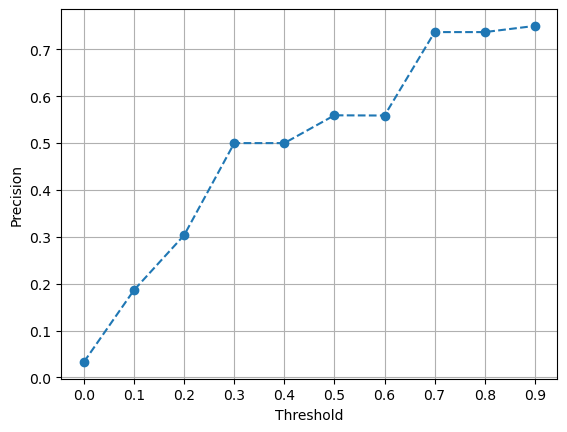

In [10]:
##Uncomment to visualize precision changes
plt.plot(results_df['threshold'], results_df['precision'], '--o', label = 'precision')
plt.xticks(thresholds)
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.grid();

[Back to top](#-Index)

### Problem 3

#### A Recall threshold function



Similar to your `precision_thresh` function, complete the function `recall_thresh` below to compute the recall given a threshold.  Your function should use the `recall_score` function to return the recall score between `y_test` and `preds` with `pos_label='Yes'`.


Inside the `result_df` DataFrame, add a column called `recall`. This column should contain the recall values at each threshold calculated using the `recall_thresh` function. 

In [11]:

def recall_thresh(predict_probs,
                  y_test,
                  thresh):
    """Given predicted probabilities and a threshold, this function
    computes predictions for the positive class at or above the threshold
    and returns the subesequent recall score for that thresholds predictions
    against the test data.

    Parameters
    ----------
    predict_probs: type 'np.ndarray'
        1D NumPy array of probabilities for positive class
    y_test: type `np.ndarray'
        1D NumPy array of test label
    thresh: type `float`
        threshold for positive classification at or above

    Returns a float for recall value
    """
    # Convert probabilities to predictions using threshold
    preds = np.where(predict_probs >= thresh, 'Yes', 'No')

    # Calculate and return recall score
    return recall_score(y_test, preds, pos_label='Yes')

# Add recall column to results_df
results_df['recall'] = results_df['threshold'].apply(
    lambda x: recall_thresh(test_predictions[:, 1], y_test, x)
)



# Answer check
print(recall_thresh(test_predictions[:, 1], y_test, 0.1))
print(recall_thresh(test_predictions[:, 1], y_test, 0.9))
results_df

0.7710843373493976
0.07228915662650602


,threshold,precision,recall
0,0.0,0.033200,1.000000
1,0.1,0.186589,0.771084
2,0.2,0.303571,0.614458
3,0.3,0.500000,0.445783
4,0.4,0.500000,0.445783
5,0.5,0.559322,0.397590
6,0.6,0.558824,0.228916
7,0.7,0.736842,0.168675
8,0.8,0.736842,0.168675
9,0.9,0.750000,0.072289


[Back to top](#-Index)

### Problem 4

#### Precision vs. Recall Tradeoff



As you see in the plot below, based on the `results_df` improving the precision involves a decrease in recall.  

<center>
    <img src = 'images/precall.png'/>
</center>

scikit learn implements a function `precision_recall_curve` that takes as arguments `y_true`, `probas_pred`, `pos_label=None`. 

The function returns the values for precision, recall, and the decision thresholds.  Use the probabilities in `test_predictions` in the `precision_recall_curve` function, and assign the results to `precision`, `recall`, and `boundaries` below.  Uncomment the plot to visualize your results.

[0.  0.1 0.2 0.3 0.4]


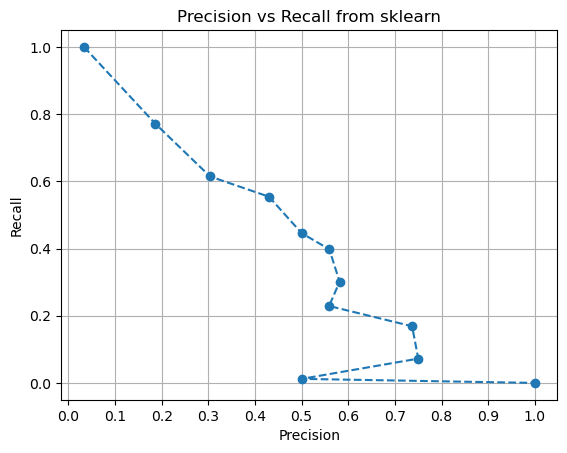

In [12]:

precision, recall, boundaries = '', '', ''

# Use precision_recall_curve with test_predictions[:, 1] for positive class probabilities
precision, recall, boundaries = precision_recall_curve(y_test,
                                                     test_predictions[:, 1],
                                                     pos_label='Yes')

# Answer check
print(boundaries[:5])
plt.plot(precision, recall, '--o')
plt.xticks(boundaries);
plt.grid()
plt.ylabel('Recall')
plt.xlabel('Precision')
plt.title('Precision vs Recall from sklearn');

[Back to top](#-Index)

### Problem 5

#### ROC Curve



Similar to the `precision_recall_curve` the `roc_curve` function takes in `y_true` and `y_score`, which can be predicted probabilities.  The function returns the false positive rates, true positive rates, and thresholds.  Assign these to `fpr`, `tpr`, and `thresh_rocs` below.  Uncomment the code to visualize the ROC curve. 

False Positive Rates:  [0.         0.00041374 0.00082747 0.00206868 0.00620604]
True Positive Rates:  [0.         0.01204819 0.07228916 0.1686747  0.22891566]


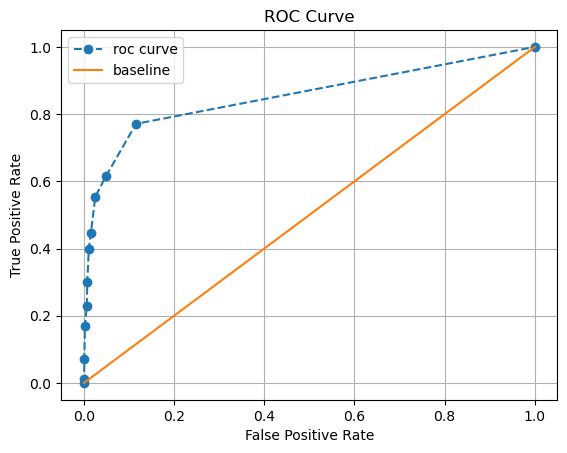

In [13]:

fpr, tpr, thresh_rocs = '', '', ''

# Use roc_curve to calculate ROC curve components
fpr, tpr, thresh_rocs = roc_curve(y_test,
                                 test_predictions[:, 1],
                                 pos_label='Yes')

# Answer check
print('False Positive Rates: ', fpr[:5])
print('True Positive Rates: ', tpr[:5])
plt.plot(fpr, tpr, '--o', label = 'roc curve')
plt.plot(tpr, tpr, label = 'baseline')
plt.legend()
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid();

[Back to top](#-Index)

### Problem 6

#### Area Under Curve as metric



Finally, consider the proposed area under the curve scoring method described in the lectures.  Below, construct a grid search named `roc_grid` that uses the `knn_pipe` and searches over the number of neighbors from 1 to 31 by odd values, choosing the model that optimizes `roc_auc_score`.  Identify the optimal number of neighbors and assign them to `best_k` below.  

In [14]:

roc_grid = ''
best_k = ''

# Create grid search with ROC AUC scoring
roc_grid = GridSearchCV(
    knn_pipe,
    param_grid={'knn__n_neighbors': range(1, 32, 2)},  # odd numbers from 1 to 31
    scoring='roc_auc',
    cv=5
)

# Fit the grid search
roc_grid.fit(X_train, y_train)

# Get the best k value
best_k = roc_grid.best_params_['knn__n_neighbors']

# Answer check
best_k

29

#### Visualizing with scikitlearn

Below, we use the `RocCurveDisplay` to display roc curves for three knn models.  You can either use predictions or estimators to create the visualization.  Below, we use the `from_estimator` method.

In [15]:
from sklearn.metrics import RocCurveDisplay

In [16]:
knn_1 = Pipeline([('transform', transformer), ('knn', KNeighborsClassifier(n_neighbors = 1))])
knn_1.fit(X_train, y_train)

/opt/homebrew/anaconda3/envs/codio/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('transform',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['student'])])),
                ('knn', KNeighborsClassifier(n_neighbors=1))])

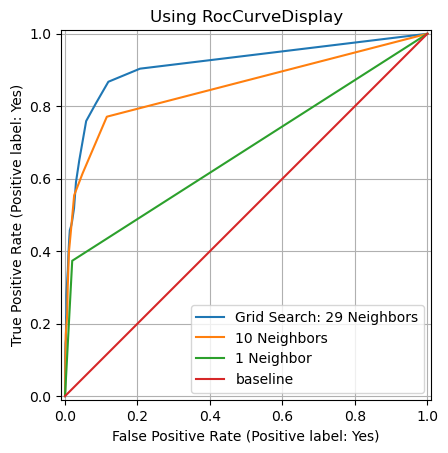

In [17]:
fig, ax = plt.subplots()
RocCurveDisplay.from_estimator(roc_grid, X_test, y_test, pos_label = 'Yes', ax = ax, label = 'Grid Search: 29 Neighbors')
RocCurveDisplay.from_estimator(knn_pipe, X_test, y_test, pos_label = 'Yes', ax = ax, label = '10 Neighbors')
RocCurveDisplay.from_estimator(knn_1, X_test, y_test, ax = ax, label = '1 Neighbor')
plt.grid()
plt.plot(np.arange(0, 1.1, .1), np.arange(0, 1.1, .1), label = 'baseline');
plt.title('Using RocCurveDisplay')
plt.legend();

### Summary of Exercises

This notebook explored evaluation curves for classifier performance, specifically focusing on Precision-Recall and ROC curves using the credit card default dataset. Here's what was covered:

1. **Precision Thresholding (Problems 1-2)**
   - Implemented a function to calculate precision scores at different probability thresholds
   - Created a DataFrame to analyze how precision changes across threshold values
   - Visualized the relationship between thresholds and precision

2. **Recall Analysis (Problem 3)**
   - Built a similar function for recall calculations
   - Demonstrated the inverse relationship between precision and recall
   - Combined both metrics in a single DataFrame for comparison

3. **Precision-Recall Curve (Problem 4)**
   - Used sklearn's `precision_recall_curve` function
   - Visualized the precision-recall tradeoff
   - Demonstrated how different thresholds affect both metrics simultaneously

4. **ROC Curve Analysis (Problem 5)**
   - Implemented ROC curve using sklearn's `roc_curve`
   - Plotted True Positive Rate vs False Positive Rate
   - Compared model performance against baseline

5. **Area Under Curve Optimization (Problem 6)**
   - Used GridSearchCV to optimize KNN classifier using ROC AUC score
   - Found optimal number of neighbors (k=29)
   - Compared ROC curves for different k values (1, 10, and 29 neighbors)

### Key Takeaways

1. There's an inherent tradeoff between precision and recall - improving one typically decreases the other
2. Threshold selection is crucial for model performance and depends on the specific needs of your application
3. ROC curves and AUC scores provide a comprehensive way to evaluate classifier performance across all possible thresholds
4. The optimal number of neighbors (k=29) for KNN classification was found using ROC AUC optimization
5. Visualization tools in sklearn (like RocCurveDisplay) make it easy to compare different model configurations